<h4>Import Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


<h4>Preprocessing

In [3]:
from sklearn.preprocessing import LabelEncoder

class_list = df.iloc[:,-1]
label_convertor = LabelEncoder()

In [4]:
y = label_convertor.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(np.array(df.iloc[:,2:-1], dtype = float))

In [6]:
X.shape

(9990, 57)

<h4>Label Encoding (ANN)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [9]:
model = keras.models.Sequential()

model.add(Dense(units= 600,activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(units=400, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=300, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

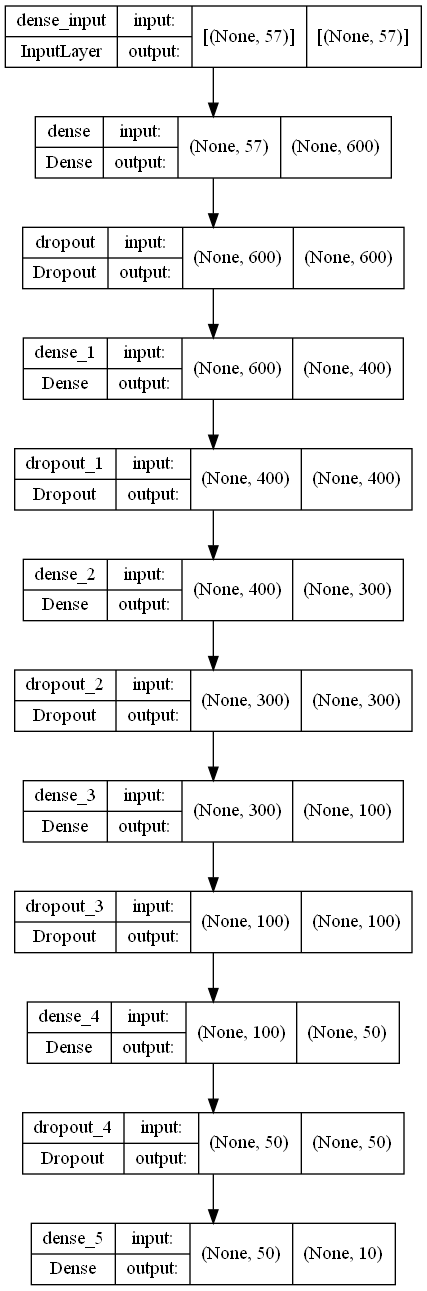

In [10]:
keras.utils.plot_model(model, "Baseline.png", show_shapes=True)

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath="weights.hdf5", monitor = 'val_accuracy', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=150, 
                    callbacks = [checkpointer], validation_data=(X_test, y_test))

Epoch 1/50
45/54 [========================>.....] - ETA: 0s - loss: 1.7733 - accuracy: 0.3599
Epoch 1: val_accuracy improved from -inf to 0.61211, saving model to weights.hdf5
54/54 [==============================] - 1s 7ms/step - loss: 1.7179 - accuracy: 0.3836 - val_loss: 1.2062 - val_accuracy: 0.6121
Epoch 2/50
46/54 [========================>.....] - ETA: 0s - loss: 1.2058 - accuracy: 0.5884
Epoch 2: val_accuracy improved from 0.61211 to 0.72172, saving model to weights.hdf5
54/54 [==============================] - 0s 5ms/step - loss: 1.1879 - accuracy: 0.5946 - val_loss: 0.8682 - val_accuracy: 0.7217
Epoch 3/50
46/54 [========================>.....] - ETA: 0s - loss: 0.9475 - accuracy: 0.6807
Epoch 3: val_accuracy improved from 0.72172 to 0.77127, saving model to weights.hdf5
54/54 [==============================] - 0s 5ms/step - loss: 0.9468 - accuracy: 0.6812 - val_loss: 0.7129 - val_accuracy: 0.7713
Epoch 4/50
45/54 [========================>.....] - ETA: 0s - loss: 0.7863 - ac

Epoch 29/50
46/54 [========================>.....] - ETA: 0s - loss: 0.0938 - accuracy: 0.9714
Epoch 29: val_accuracy did not improve from 0.92342
54/54 [==============================] - 0s 4ms/step - loss: 0.0962 - accuracy: 0.9711 - val_loss: 0.3252 - val_accuracy: 0.9174
Epoch 30/50
46/54 [========================>.....] - ETA: 0s - loss: 0.0976 - accuracy: 0.9697
Epoch 30: val_accuracy did not improve from 0.92342
54/54 [==============================] - 0s 4ms/step - loss: 0.0986 - accuracy: 0.9700 - val_loss: 0.3491 - val_accuracy: 0.9164
Epoch 31/50
46/54 [========================>.....] - ETA: 0s - loss: 0.0990 - accuracy: 0.9691
Epoch 31: val_accuracy did not improve from 0.92342
54/54 [==============================] - 0s 4ms/step - loss: 0.0982 - accuracy: 0.9693 - val_loss: 0.3976 - val_accuracy: 0.9044
Epoch 32/50
44/54 [=======================>......] - ETA: 0s - loss: 0.0898 - accuracy: 0.9736
Epoch 32: val_accuracy did not improve from 0.92342
54/54 [==================

In [12]:
model.save("Baseline.h5")

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=100)
print('test_loss: ', test_loss)
print('test acc: ', test_acc*100)

20/20 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.9209
test_loss:  0.35881727933883667
test acc:  92.09209084510803


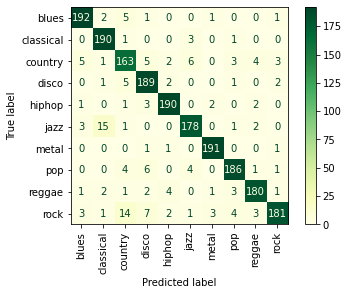

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = label_convertor.inverse_transform(y_pred)

y_test_label = label_convertor.inverse_transform(y_test)

disp = ConfusionMatrixDisplay.from_predictions(y_test_label, y_pred, display_labels=label_convertor.classes_,
                                               xticks_rotation="vertical", cmap="YlGn")

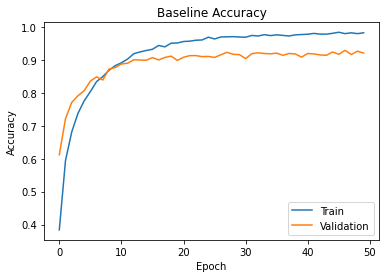

In [15]:
import matplotlib.pyplot as plt

plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Baseline Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

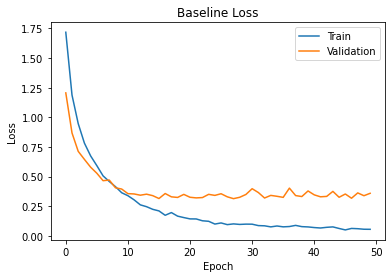

In [16]:
plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Baseline Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

<h4>One Hot Encoding (ANN)

In [17]:
ohe = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, ohe, test_size=0.2)

In [18]:
model_ohe = keras.models.Sequential()

model_ohe.add(Dense(units= 600, activation='relu', input_shape=(X_train.shape[1],)))
model_ohe.add(Dropout(0.2))
model_ohe.add(Dense(units=400, activation='relu'))
model_ohe.add(Dropout(0.2))
model_ohe.add(Dense(units=50, activation='relu'))
model_ohe.add(Dropout(0.2))
model_ohe.add(Dense(units=10, activation='softmax'))

model_ohe.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

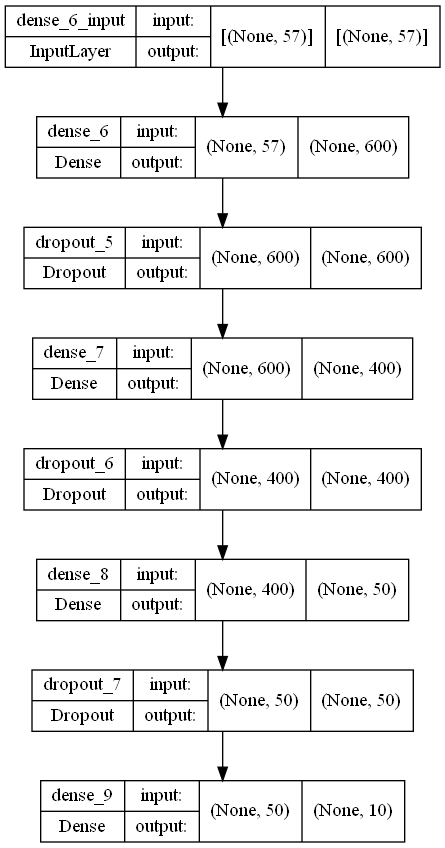

In [19]:
keras.utils.plot_model(model_ohe, "OneHotEncoding.png", show_shapes=True)

In [20]:
checkpointer = ModelCheckpoint(filepath="weights.hdf5", monitor = 'val_accuracy', verbose=1, save_best_only=True)

history = model_ohe.fit(X_train, y_train, epochs=50, batch_size=150, 
                    callbacks = [checkpointer], validation_data=(X_test, y_test))

Epoch 1/50
47/54 [=========================>....] - ETA: 0s - loss: 1.4993 - accuracy: 0.4705
Epoch 1: val_accuracy improved from -inf to 0.67768, saving model to weights.hdf5
54/54 [==============================] - 1s 6ms/step - loss: 1.4547 - accuracy: 0.4857 - val_loss: 0.9618 - val_accuracy: 0.6777
Epoch 2/50
47/54 [=========================>....] - ETA: 0s - loss: 0.9818 - accuracy: 0.6570
Epoch 2: val_accuracy improved from 0.67768 to 0.75526, saving model to weights.hdf5
54/54 [==============================] - 0s 5ms/step - loss: 0.9717 - accuracy: 0.6622 - val_loss: 0.7490 - val_accuracy: 0.7553
Epoch 3/50
48/54 [=========================>....] - ETA: 0s - loss: 0.8076 - accuracy: 0.7229
Epoch 3: val_accuracy improved from 0.75526 to 0.77277, saving model to weights.hdf5
54/54 [==============================] - 0s 4ms/step - loss: 0.8078 - accuracy: 0.7225 - val_loss: 0.6797 - val_accuracy: 0.7728
Epoch 4/50
47/54 [=========================>....] - ETA: 0s - loss: 0.6858 - ac

Epoch 29/50
47/54 [=========================>....] - ETA: 0s - loss: 0.0871 - accuracy: 0.9716
Epoch 29: val_accuracy improved from 0.91441 to 0.92142, saving model to weights.hdf5
54/54 [==============================] - 0s 5ms/step - loss: 0.0896 - accuracy: 0.9705 - val_loss: 0.3048 - val_accuracy: 0.9214
Epoch 30/50
47/54 [=========================>....] - ETA: 0s - loss: 0.0972 - accuracy: 0.9701
Epoch 30: val_accuracy did not improve from 0.92142
54/54 [==============================] - 0s 4ms/step - loss: 0.0978 - accuracy: 0.9696 - val_loss: 0.2882 - val_accuracy: 0.9109
Epoch 31/50
47/54 [=========================>....] - ETA: 0s - loss: 0.0903 - accuracy: 0.9694
Epoch 31: val_accuracy did not improve from 0.92142
54/54 [==============================] - 0s 4ms/step - loss: 0.0908 - accuracy: 0.9696 - val_loss: 0.2906 - val_accuracy: 0.9144
Epoch 32/50
48/54 [=========================>....] - ETA: 0s - loss: 0.0791 - accuracy: 0.9743
Epoch 32: val_accuracy improved from 0.9214

In [21]:
model_ohe.save("OneHotEncoding.h5")

In [22]:
test_loss, test_acc = model_ohe.evaluate(X_test, y_test, batch_size=100)
print('test_loss: ', test_loss)
print('test acc: ', test_acc*100)

20/20 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.9204
test_loss:  0.3246060907840729
test acc:  92.04204082489014


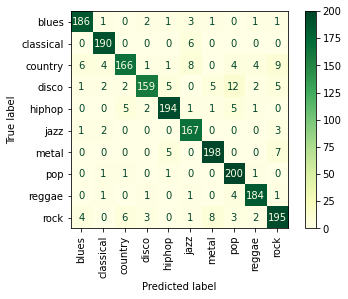

In [23]:
y_pred = model_ohe.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = label_convertor.inverse_transform(y_pred)

y_test_label = np.argmax(np.array(y_test), axis = 1)
y_test_label = label_convertor.inverse_transform(y_test_label)

disp = ConfusionMatrixDisplay.from_predictions(y_test_label, y_pred, display_labels=label_convertor.classes_,
                                               xticks_rotation="vertical", cmap="YlGn")

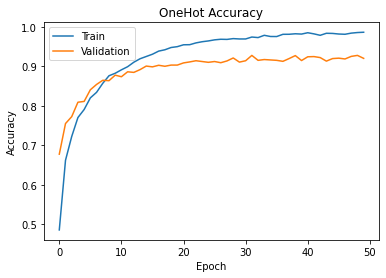

In [24]:
plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('OneHot Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

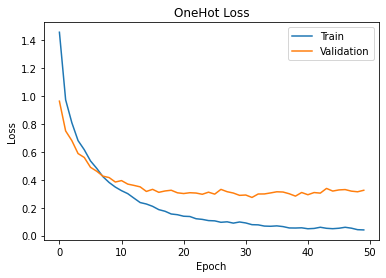

In [25]:
plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('OneHot Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()